In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [59]:
# Load the dataset
phishing_url_df = pd.read_csv('datasets/phishtank_dump.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
phishing_url_df.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8659459,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T14:41:45+00:00,yes,2024-07-16T14:53:16+00:00,yes,Other
1,8659455,https://neighbourlynorth.com/wp-admin/CHFINAL/...,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T14:39:29+00:00,yes,2024-07-16T14:53:16+00:00,yes,Other
2,8659454,https://myworkspace47e37.myclickfunnels.com/sw...,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T14:39:28+00:00,yes,2024-07-16T14:53:16+00:00,yes,Other
3,8659451,https://pos.uhaul.net.uhaulpos.net,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T14:37:32+00:00,yes,2024-07-16T14:53:16+00:00,yes,Other
4,8659450,https://southern-glow-number.glitch.me/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T14:36:07+00:00,yes,2024-07-16T14:53:16+00:00,yes,Other


In [60]:
# Assuming your DataFrame is named df
# Keep only the 'url' column
phishing_url_df = phishing_url_df[['url']]

# Display the filtered DataFrame
phishing_url_df

,url
0,https://docs.google.com/presentation/d/e/2PACX...
1,https://neighbourlynorth.com/wp-admin/CHFINAL/...
2,https://myworkspace47e37.myclickfunnels.com/sw...
3,https://pos.uhaul.net.uhaulpos.net
4,https://southern-glow-number.glitch.me/
...,...
64186,http://www.ezblox.site/free/jennifer111/helpdesk
64187,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
64188,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
64189,http://www.habbocreditosparati.blogspot.com/


In [61]:
# Function to extract the subdomain, domain, and TLD
def extract_domain(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return domain

phishing_url_df['domain'] = phishing_url_df['url'].apply(extract_domain)

In [62]:
# Remove duplicates based on the 'domain' column
phishing_url_df = phishing_url_df.drop_duplicates(subset='domain')

In [63]:
# drop the 'domain' column if you only need the 'domain'
phishing_url_df.drop(columns=['domain'], inplace=True)

/var/folders/zg/35ghknm958b4ltq43qlvw2dh0000gn/T/ipykernel_36933/2170096719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_url_df.drop(columns=['domain'], inplace=True)


In [64]:
# Reset the index
phishing_url_df.reset_index(drop=True, inplace=True)

In [65]:
phishing_url_df['label'] = 1

/var/folders/zg/35ghknm958b4ltq43qlvw2dh0000gn/T/ipykernel_36933/3756835367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_url_df['label'] = 1


In [66]:
phishing_url_df

,url,label
0,https://docs.google.com/presentation/d/e/2PACX...,1
1,https://neighbourlynorth.com/wp-admin/CHFINAL/...,1
2,https://myworkspace47e37.myclickfunnels.com/sw...,1
3,https://pos.uhaul.net.uhaulpos.net,1
4,https://southern-glow-number.glitch.me/,1
...,...,...
40019,http://whare.100webspace.net/joomla/plugins/fm...,1
40020,http://webmailadmin0.myfreesites.net/,1
40021,http://www.ezblox.site/free/jennifer111/helpdesk,1
40022,http://www.habbocreditosparati.blogspot.com/,1


## Legit URL Dataset

In [3]:
# Load the dataset
legit_url_df = pd.read_csv('datasets/top10milliondomains.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
legit_url_df.head()

,Rank,Domain,Open Page Rank
0,1,facebook.com,10.0
1,2,fonts.googleapis.com,10.0
2,3,google.com,10.0
3,4,youtube.com,10.0
4,5,twitter.com,10.0


In [4]:
legit_url_df

,Rank,Domain,Open Page Rank
0,1,facebook.com,10.00
1,2,fonts.googleapis.com,10.00
2,3,google.com,10.00
3,4,youtube.com,10.00
4,5,twitter.com,10.00
...,...,...,...
9999995,9999996,cambridgenanotechald.com,3.32
9999996,9999997,jigsawsite.com,3.32
9999997,9999998,masteringprivateequity.com,3.32
9999998,9999999,openheartcounselingatx.com,3.32


In [69]:
# drop the 'Open Page Rank' column
legit_url_df.drop(columns=['Open Page Rank'], inplace=True)

# drop the 'Rank' column
legit_url_df.drop(columns=['Rank'], inplace=True)

In [70]:
legit_url_df['label'] = 0

In [71]:
legit_url_df = legit_url_df.rename(columns={'Domain': 'url'})

In [72]:
legit_url_df

,url,label
0,facebook.com,0
1,fonts.googleapis.com,0
2,google.com,0
3,youtube.com,0
4,twitter.com,0
...,...,...
9999995,cambridgenanotechald.com,0
9999996,jigsawsite.com,0
9999997,masteringprivateequity.com,0
9999998,openheartcounselingatx.com,0


## Combine Dataset

In [73]:
# import pandas as pd 

# Sample DataFrame creation for demonstration purposes
# phishing_url_df = pd.DataFrame({'url': ['phishing_url_{}'.format(i) for i in range(10000)]})
# legit_url_df = pd.DataFrame({'url': ['legit_url_{}'.format(i) for i in range(10000)]})

# Sample 20000 rows from phishing_url_df
sampled_phishing = phishing_url_df.sample(n=20000, random_state=42)

# Pick the top 20000 rows from legit_url_df
top_legit = legit_url_df.head(20000)

# Combine the two DataFrames
combined_url_df = pd.concat([sampled_phishing, top_legit], ignore_index=True)

# Display the combined DataFrame
print(combined_url_df)

                                                     url  label
0                               https://1244.2ooble.com/      1
1                        http://tide.co-moveaccount.com/      1
2                    https://shaw-104904.weeblysite.com/      1
3      https://www.agodabusiness.org/index/account/in...      1
4      https://hello-world-still-art-f29d.cardagofye....      1
...                                                  ...    ...
39995                                  f1000research.com      0
39996                                       bucknell.edu      0
39997                           allergyasthmanetwork.org      0
39998                                   dailygazette.com      0
39999                                           elisa.fi      0

[40000 rows x 2 columns]


In [74]:
# combined_url_df
combined_url_df = combined_url_df.rename(columns={'url': 'text'})

In [75]:
combined_url_df

,text,label
0,https://1244.2ooble.com/,1
1,http://tide.co-moveaccount.com/,1
2,https://shaw-104904.weeblysite.com/,1
3,https://www.agodabusiness.org/index/account/in...,1
4,https://hello-world-still-art-f29d.cardagofye....,1
...,...,...
39995,f1000research.com,0
39996,bucknell.edu,0
39997,allergyasthmanetwork.org,0
39998,dailygazette.com,0


label
1    20000
0    20000
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

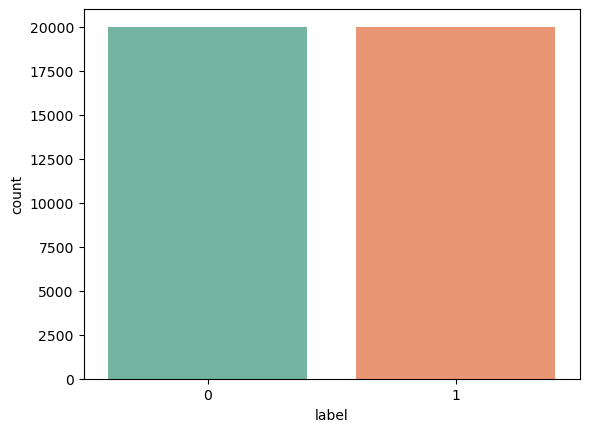

In [76]:
# Check the distribution of labels
print(combined_url_df['label'].value_counts())

sns.countplot(x = 'label', data = combined_url_df, palette = 'Set2')

## Split into Training and Validation Dataset

In [77]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(combined_url_df, test_size=0.2, random_state=42)

# Verify the splits
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(validation_df)}')

Training set size: 32000
Validation set size: 8000


In [78]:
# Save training dataset to CSV
train_df.to_csv('url_train_dataset_unbalance.csv', index=False)

# Save validation dataset to CSV
validation_df.to_csv('url_validation_dataset_unbalance.csv', index=False)

label
0    16014
1    15986
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

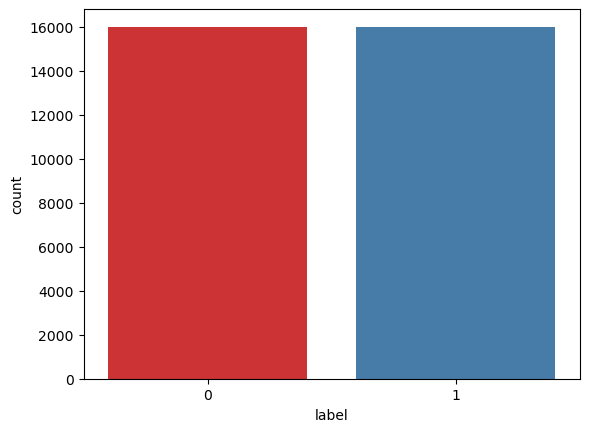

In [79]:
# Check the distribution of labels
print(train_df['label'].value_counts())

sns.countplot(x = 'label', data = train_df, palette = 'Set1')

label
1    4014
0    3986
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

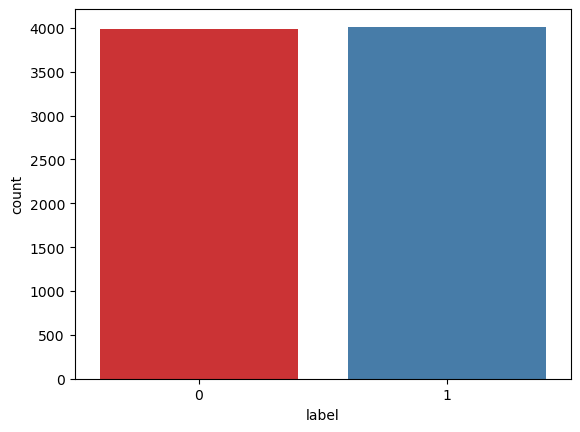

In [80]:
# Check the distribution of labels
print(validation_df['label'].value_counts())

sns.countplot(x = 'label', data = validation_df, palette = 'Set1')